* This project contains data analysis on Bitcoin and other cryptocurrencies. The analysis includes various aspects such as market capitalization, price changes, and volatility of cryptocurrencies.

In [2]:
# Analyzing the market capitalization of the top 10 cryptocurrencies on the 6th of December 2017 and visualize their percentage change in market capitalization over 24 hours and 7 days.

# Importing libraries and setting aesthetics for plotting later.
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading the data from CSV
dec6 = pd.read_csv("datasets/coinmarketcap_06122017.csv")

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6.loc[:, ["id", "market_cap_usd"]]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [3]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query("market_cap_usd > 0")

cap.count()

id                1031
market_cap_usd    1031
dtype: int64

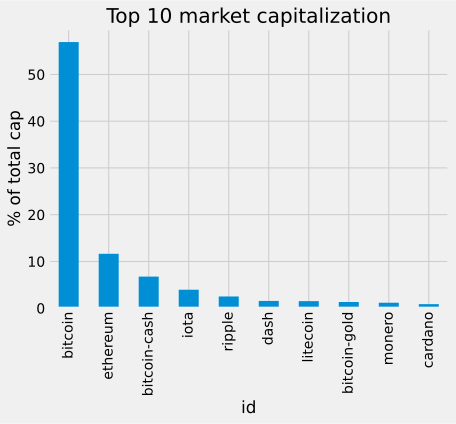

In [4]:
# Plotting the Top 10 Market Capitalization

# Selecting the top 10 cryptocurrencies and setting the index
cap10 = dec6.head(10).set_index("id")

# Calculating market capitalization percentage

def market_cap_perc_calculate(row):
    total_market_cap = cap["market_cap_usd"].sum()
    return (row["market_cap_usd"] / total_market_cap) * 100

cap10 = cap10.assign(market_cap_perc=lambda x: market_cap_perc_calculate(x))


 # Plotting the barplot with the title defined above

ax = cap10.plot(kind='bar', y='market_cap_perc', legend=None)
ax.set_title('Top 10 market capitalization')
ax.set_ylabel('% of total cap')

plt.show()

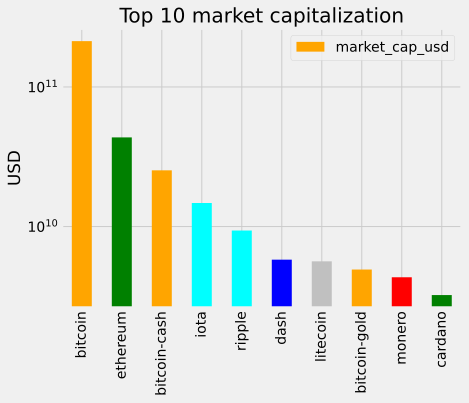

In [5]:
"""
Using colors to group similar cryptocurrencies and improving readability

Colors are chosen based on certain characteristics of cryptocurrencies:
- Orange for bitcoin-cash and bitcoin-gold, as they are forks of the bitcoin blockchain
- Green for Ethereum and Cardano, both offering Turing Complete smart contracts
- Cyan for Iota and Ripple, which are not minable
- Blue, silver, red, and green for Dash, Litecoin, and Monero respectively, to differentiate them
"""

# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = dec6.head(10).plot.bar(x="id", y="market_cap_usd", color=COLORS, logy=True)


ax.set_ylabel('USD')
ax.set_xlabel('')
ax.set_title('Top 10 market capitalization')
plt.show()


In [6]:
# Volatility in cryptocurrencies

# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting index to 'id' and dropping all NaN rows
volatility = volatility.set_index("id").dropna()

# Sorting DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

volatility.head(10)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


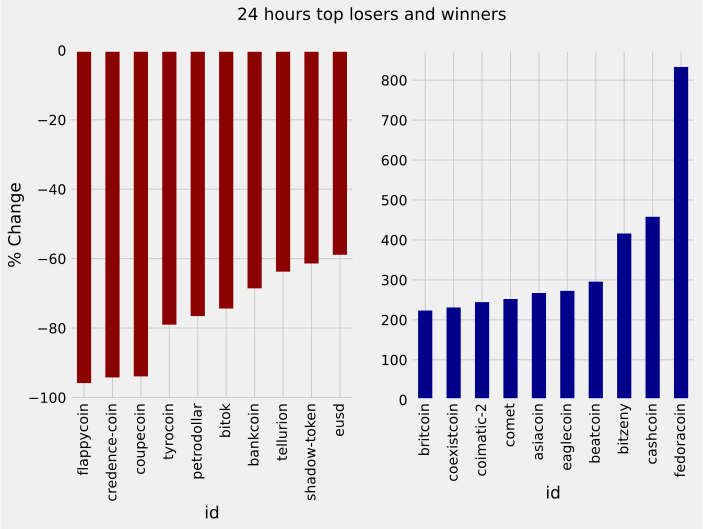

In [7]:
# Plot the top 10 biggest gainers and top 10 losers in market capitalization

def top10_subplot(volatility_series, title):

    # Making the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # For the top 10 losers
    ax = volatility_series.head(10).plot.bar(ax=axes[0], color='darkred')

    fig.suptitle(title)
    ax.set_ylabel('% Change')

    # For the top 10 winners
    ax = volatility_series.tail(10).plot.bar(ax=axes[1], color='darkblue')

    return fig, ax
 
fig, ax = top10_subplot(volatility.percent_change_24h, "24 hours top losers and winners")

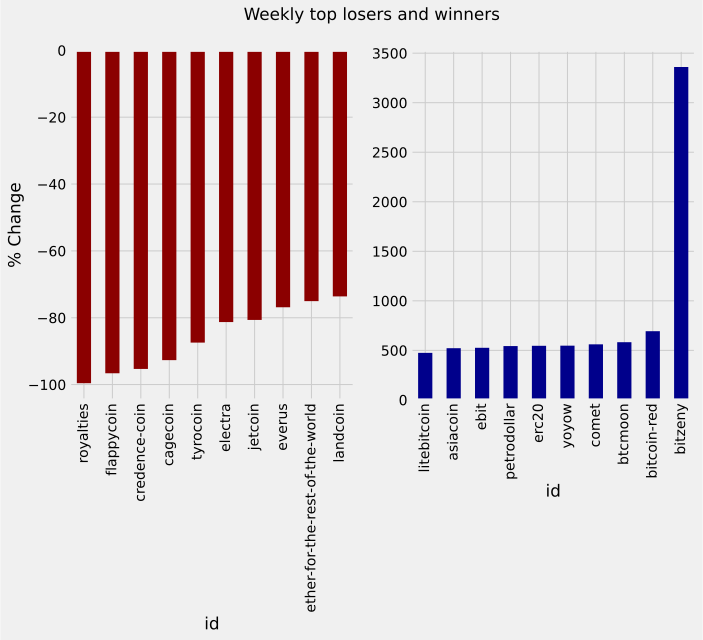

In [8]:

# Sorting percent_change_7d in ascending order to analyze weekly changes
volatility7d = volatility.sort_values("percent_change_7d")

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, "Weekly top losers and winners")

In [9]:
# Filtering large market capitalizations

# Selecting everything bigger than 10 billion 
largecaps = cap.query("market_cap_usd > 10000000000")

largecaps


,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


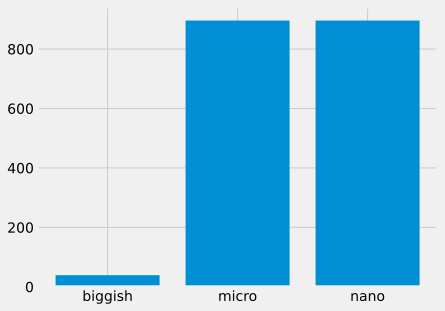

In [10]:
# Classifying market capitalizations

# Making a function to count different market caps from the "cap" DataFrame. Returns an int.
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]


# Using capcount to count the number of cryptocurrencies in each category
biggish = capcount("market_cap_usd > 300000000")

micro = capcount("50000000 >= market_cap_usd & market_cap_usd < 300000000")

nano =  capcount("market_cap_usd < 50000000")

values = (biggish, micro, nano)

plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()
